# Visualization with Seaborn

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors. We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [9]:
# Create some random walk data 
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

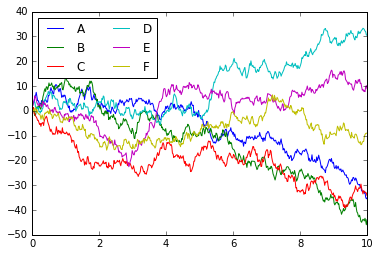

In [10]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

In [11]:
import seaborn as sns
# Set style
sns.set()

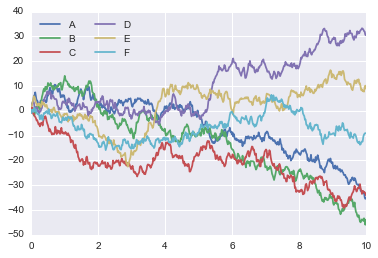

In [12]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

### Histograms, KDE, and densities

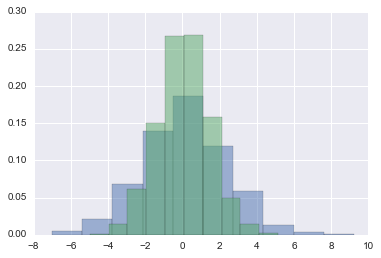

In [19]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with `sns.kdeplot`:

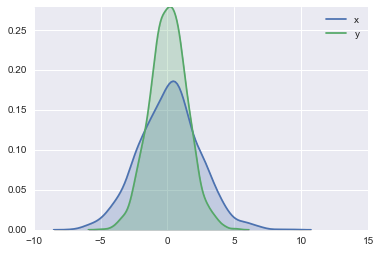

In [21]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using `distplot`:

C:\Users\Batakrishna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


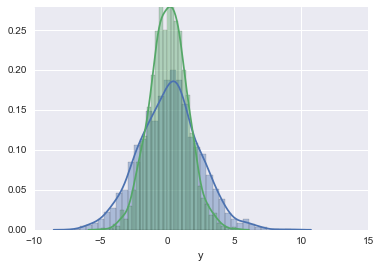

In [23]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full 2d dataset to `kdeplot`, we will get a two-dimensional visualization of the data:

C:\Users\Batakrishna\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


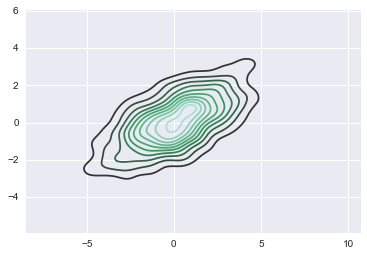

In [25]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using `sns.jointplot`. For this plot, we'll set the style to a white background:

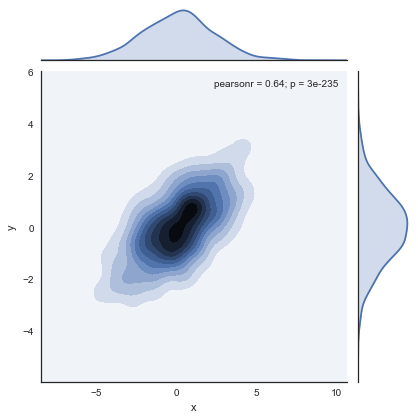

In [26]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

C:\Users\Batakrishna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


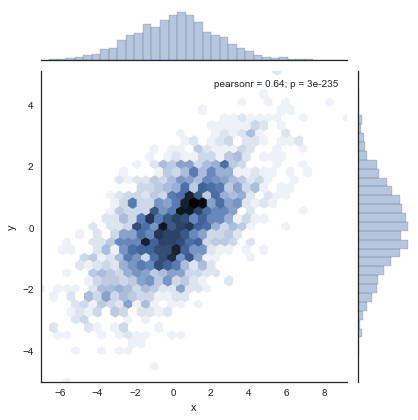

In [27]:
# hexagonally based histogram
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plots

When we generalize joint plots to datasets of larger dimensions, we end up with pair plots. This is very useful for exploring correlations between multidimensional data, when we'd like to plot all pairs of values against each other.

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling `sns.pairplot`:

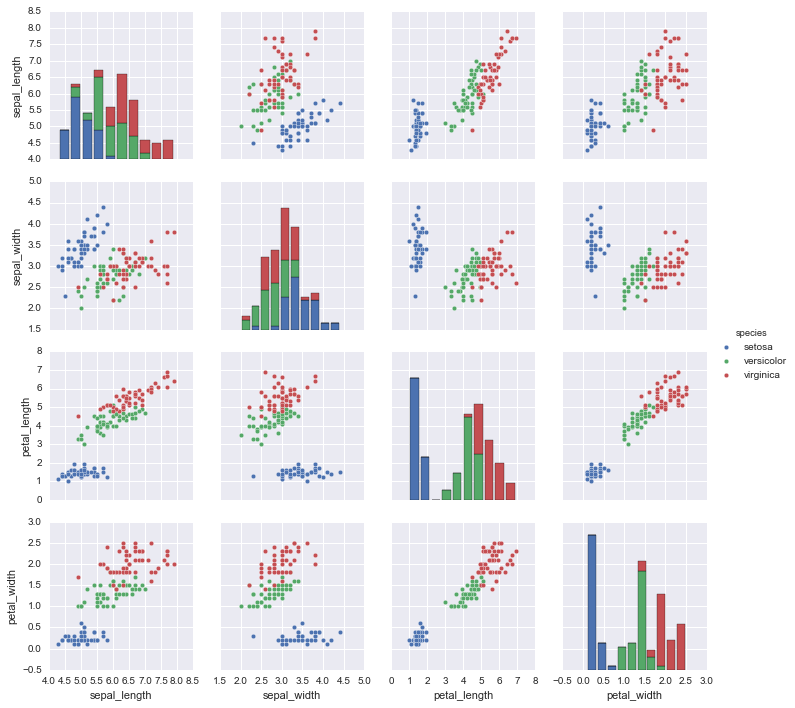

In [30]:
sns.pairplot(iris, hue='species', size=2.5);

## Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's `FacetGrid` makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [38]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


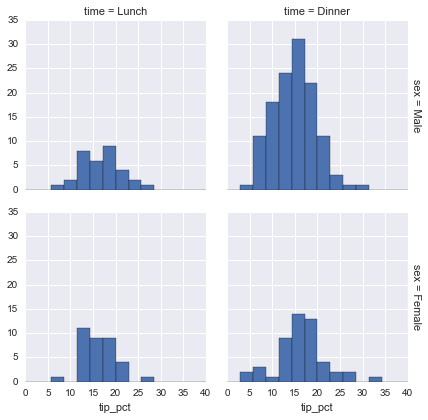

In [40]:
tips['tip_pct']= 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

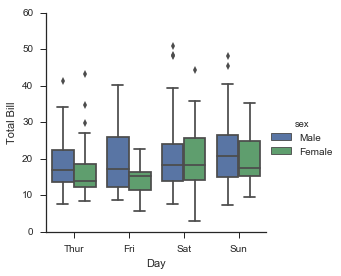

In [42]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");    

## Joint distribtuions

Similar to pairplot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

C:\Users\Batakrishna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


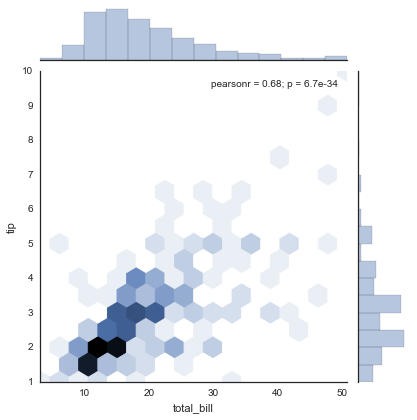

In [43]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

C:\Users\Batakrishna\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


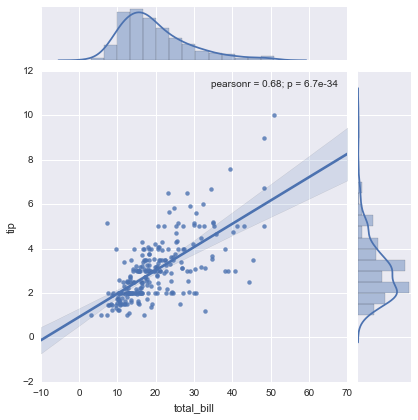

In [44]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## Bar plots

Time series can be plotted using `sns.factorplot`. In the following example, we'll use the Planets data.

In [45]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


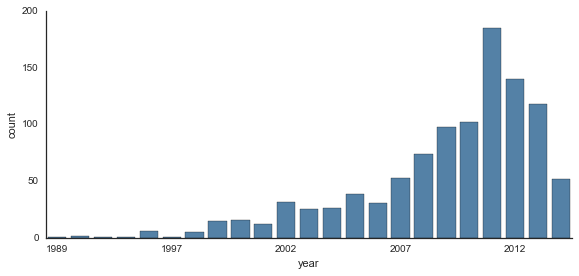

In [46]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

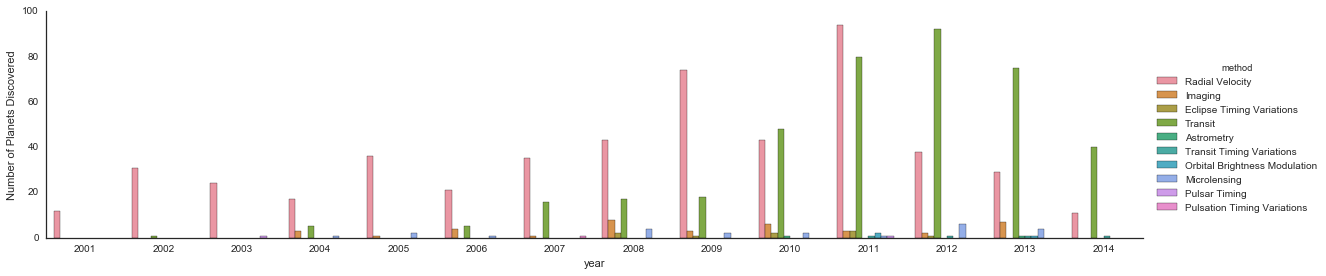

In [47]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')